Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
like = Rosenbrock(10)
transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run51
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=5, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=115, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=5, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_f

In [7]:
sampler.run(strategy=['rejection_prior', 'mcmc'])

[nnest.sampler] [INFO] MCMC steps [50]
[nnest.sampler] [INFO] Initial scale [0.6325]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-3.2717e+05] max logl [-1.6128e+03] logz [-3.2718e+05] vol [1.00000e+00] ncalls [1001] mean calls [0.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-1.6863e+05] max logl [-1.6128e+03] logz [-1.6863e+05] vol [8.18731e-01] ncalls [1220] mean calls [1.2000]
[nnest.sampler] [INFO] Step [400] loglstar [-1.4140e+05] max logl [-1.6128e+03] logz [-1.4141e+05] vol [6.70320e-01] ncalls [1485] mean calls [1.3000]
[nnest.sampler] [INFO] Step [600] loglstar [-1.2353e+05] max logl [-1.6128e+03] logz [-1.2354e+05] vol [5.48812e-01] ncalls [1811] mean calls [1.6000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.0826e+05] max logl [-1.6128e+03] logz [-1.0827e+05] vol [4.49329e-01] ncalls [2207] mean calls [1.4000]
[nnest.sampler] [INFO] Step [1000] loglstar [-9.6824e+04] max logl [-1.6128e+03] logz [-9.6832e+04] vol [3.67879e-0

[nnest.trainer] [INFO] Epoch [199] ran out of patience
[nnest.trainer] [INFO] Best epoch [149] validation loss [0.0204]
[nnest.sampler] [INFO] Acceptance [0.5560] min ESS [2.0635] max ESS [8.6168] average jump [0.1343]
[nnest.sampler] [INFO] Step [6000] loglstar [-1.1152e+04] maxlogl [-9.0590e+02] logz [-1.1165e+04] vol [2.47875e-03] ncalls [129835] scale [0.1393]
[nnest.sampler] [INFO] Acceptance [0.5560] min ESS [2.3404] max ESS [8.0442] average jump [0.1355]
[nnest.sampler] [INFO] Step [6200] loglstar [-1.0352e+04] maxlogl [-9.0590e+02] logz [-1.0365e+04] vol [2.02943e-03] ncalls [137104] scale [0.2804]
[nnest.sampler] [INFO] Acceptance [0.4780] min ESS [1.5379] max ESS [10.9957] average jump [0.1419]
[nnest.sampler] [INFO] Step [6400] loglstar [-9.5823e+03] maxlogl [-9.0119e+02] logz [-9.5956e+03] vol [1.66156e-03] ncalls [144401] scale [0.1683]
[nnest.sampler] [INFO] Acceptance [0.5940] min ESS [2.2806] max ESS [9.1728] average jump [0.1175]
[nnest.sampler] [INFO] Step [6600] logl

[nnest.sampler] [INFO] Step [10600] loglstar [-1.9092e+03] maxlogl [-2.5601e+02] logz [-1.9261e+03] vol [2.49160e-05] ncalls [299090] scale [0.1535]
[nnest.sampler] [INFO] Acceptance [0.4520] min ESS [5.4291] max ESS [17.8803] average jump [0.1017]
[nnest.sampler] [INFO] Step [10800] loglstar [-1.7839e+03] maxlogl [-2.5601e+02] logz [-1.8007e+03] vol [2.03995e-05] ncalls [306312] scale [0.3508]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0326]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0277] validation loss [-0.0299]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0315] validation loss [-0.0319]
[nnest.trainer] [INFO] Epoch [58] ran out of patience
[nnest.trainer] [INFO] Best epoch [8] validation loss [-0.0320]
[nnest.sampler] [INFO] Acceptance [0.5360] min ESS [3.3274] max ESS [16.8592] average jump [0.0854]
[nnest.sampler] [INFO] Step [11000] loglstar [-1.6662e+03] maxlogl [-2.5601e+02] logz [-1.6836e+03] vol [1.67017e-05] 

[nnest.sampler] [INFO] Step [15200] loglstar [-4.5730e+02] maxlogl [-1.0062e+02] logz [-4.7690e+02] vol [2.50452e-07] ncalls [470384] scale [0.3344]
[nnest.sampler] [INFO] Acceptance [0.4660] min ESS [7.0648] max ESS [42.0987] average jump [0.0725]
[nnest.sampler] [INFO] Step [15400] loglstar [-4.3373e+02] maxlogl [-7.6592e+01] logz [-4.5372e+02] vol [2.05052e-07] ncalls [477905] scale [0.1865]
[nnest.sampler] [INFO] Acceptance [0.5340] min ESS [3.9313] max ESS [42.1990] average jump [0.0638]
[nnest.sampler] [INFO] Step [15600] loglstar [-4.1314e+02] maxlogl [-7.6592e+01] logz [-4.3316e+02] vol [1.67883e-07] ncalls [485523] scale [0.1599]
[nnest.sampler] [INFO] Acceptance [0.4980] min ESS [4.5764] max ESS [38.6786] average jump [0.0560]
[nnest.sampler] [INFO] Step [15800] loglstar [-3.9052e+02] maxlogl [-7.6592e+01] logz [-4.1127e+02] vol [1.37451e-07] ncalls [493185] scale [0.2552]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0203]

[nnest.trainer] [INFO] Training jitter [0.0137]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1161] validation loss [-0.1173]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.1197] validation loss [-0.1201]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.1202] validation loss [-0.1200]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.1213] validation loss [-0.1200]
[nnest.trainer] [INFO] Epoch [185] ran out of patience
[nnest.trainer] [INFO] Best epoch [135] validation loss [-0.1205]
[nnest.sampler] [INFO] Acceptance [0.5760] min ESS [9.8029] max ESS [51.0000] average jump [0.0378]
[nnest.sampler] [INFO] Step [20000] loglstar [-1.3923e+02] maxlogl [-3.9829e+01] logz [-1.6270e+02] vol [2.06115e-09] ncalls [653126] scale [0.4001]
[nnest.sampler] [INFO] Acceptance [0.4420] min ESS [13.8887] max ESS [51.0000] average jump [0.0442]
[nnest.sampler] [INFO] Step [20200] loglstar [-1.3323e+02] maxlogl [-3.9829e+01] logz [-1.5680e+02] vol [1.68753e-09] ncalls [660635] scale [0.2839]
[nnest.

[nnest.sampler] [INFO] Acceptance [0.5900] min ESS [11.2406] max ESS [51.0000] average jump [0.0237]
[nnest.sampler] [INFO] Step [24600] loglstar [-5.5113e+01] maxlogl [-1.9954e+01] logz [-8.2079e+01] vol [2.07184e-11] ncalls [829397] scale [0.2554]
[nnest.sampler] [INFO] Acceptance [0.4760] min ESS [9.7657] max ESS [51.0000] average jump [0.0223]
[nnest.sampler] [INFO] Step [24800] loglstar [-5.3056e+01] maxlogl [-1.8533e+01] logz [-8.0105e+01] vol [1.69628e-11] ncalls [837110] scale [0.3482]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0082]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1660] validation loss [-0.1672]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.1691] validation loss [-0.1697]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.1704] validation loss [-0.1697]
[nnest.trainer] [INFO] Epoch [129] ran out of patience
[nnest.trainer] [INFO] Best epoch [79] validation loss [-0.1699]
[nnest.sampler] [INFO] Acceptance

[nnest.sampler] [INFO] Acceptance [0.5220] min ESS [6.3502] max ESS [51.0000] average jump [0.0184]
[nnest.sampler] [INFO] Step [29400] loglstar [-2.4205e+01] maxlogl [-6.7780e+00] logz [-5.4663e+01] vol [1.70507e-13] ncalls [1017844] scale [0.1394]
[nnest.sampler] [INFO] Acceptance [0.4760] min ESS [8.1993] max ESS [51.0000] average jump [0.0163]
[nnest.sampler] [INFO] Step [29600] loglstar [-2.3428e+01] maxlogl [-6.7780e+00] logz [-5.4084e+01] vol [1.39599e-13] ncalls [1025875] scale [0.1182]
[nnest.sampler] [INFO] Acceptance [0.5800] min ESS [8.5784] max ESS [51.0000] average jump [0.0157]
[nnest.sampler] [INFO] Step [29800] loglstar [-2.2682e+01] maxlogl [-6.7780e+00] logz [-5.3520e+01] vol [1.14294e-13] ncalls [1033793] scale [0.3310]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0050]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.2102] validation loss [-0.2126]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.2147] validation

[nnest.sampler] [INFO] Step [33800] loglstar [-1.2986e+01] maxlogl [-3.6909e+00] logz [-4.6763e+01] vol [2.09337e-15] ncalls [1194216] scale [0.3160]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0034]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.2534] validation loss [-0.2571]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.2575] validation loss [-0.2586]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.2589] validation loss [-0.2591]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.2594] validation loss [-0.2594]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.2594] validation loss [-0.2596]
[nnest.trainer] [INFO] Epoch [208] ran out of patience
[nnest.trainer] [INFO] Best epoch [158] validation loss [-0.2604]
[nnest.sampler] [INFO] Acceptance [0.4740] min ESS [11.5905] max ESS [51.0000] average jump [0.0157]
[nnest.sampler] [INFO] Step [34000] loglstar [-1.2606e+01] maxlogl [-3.6909e+00] logz [-4.6570e+01] vol [1.71391e-15

[nnest.sampler] [INFO] Step [38400] loglstar [-6.6420e+00] maxlogl [-1.6069e+00] logz [-4.3978e+01] vol [2.10422e-17] ncalls [1380204] scale [0.1672]
[nnest.sampler] [INFO] Acceptance [0.5980] min ESS [19.5969] max ESS [51.0000] average jump [0.0225]
[nnest.sampler] [INFO] Step [38600] loglstar [-6.4213e+00] maxlogl [-1.4011e+00] logz [-4.3911e+01] vol [1.72279e-17] ncalls [1388309] scale [0.1819]
[nnest.sampler] [INFO] Acceptance [0.4780] min ESS [7.8870] max ESS [51.0000] average jump [0.0220]
[nnest.sampler] [INFO] Step [38800] loglstar [-6.2234e+00] maxlogl [-1.4011e+00] logz [-4.3847e+01] vol [1.41050e-17] ncalls [1396371] scale [0.2835]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0021]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.3060] validation loss [-0.3107]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.3089] validation loss [-0.3123]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.3093] validation loss [-0.3119]
[

In [8]:
print(sampler.logz)

-43.00924992492284


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

18438.51055809627
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      9.3957999E-01  2.3123644E-01  9.3554503E-01  1.0381362E+00  two    7.6099765E-01  1.1015489E+00  two   -9.5463820E-01  1.0906322E+00  two     p_{1}
param2      9.3846361E-01  1.4540210E-01  9.2552519E-01  1.0387042E+00  two    6.5696970E-01  1.0992447E+00  two    8.2943393E-02  1.0882474E+00  two     p_{2}
param3      9.0783939E-01  1.8897004E-01  9.0880708E-01  1.0432991E+00  two    4.5650231E-01  1.1017179E+00  two    3.9566113E-02  1.1060427E+00  two     p_{3}
param4      8.6214725E-01  2.3758110E-01  8.7406038E-01  1.0510640E+00  two   -1.6524878E-02  1.0980375E+00  two   -3.1233504E-02  1.1008732E+00  two     p_{4}
param5      8.0450052E-01  2.8474067E-01  8.0502375E-01  1.0661090E+00  two   -4.6494964E-02  1.1013382E+00  two   -5.6253809E-02  1.1039547E+00  two

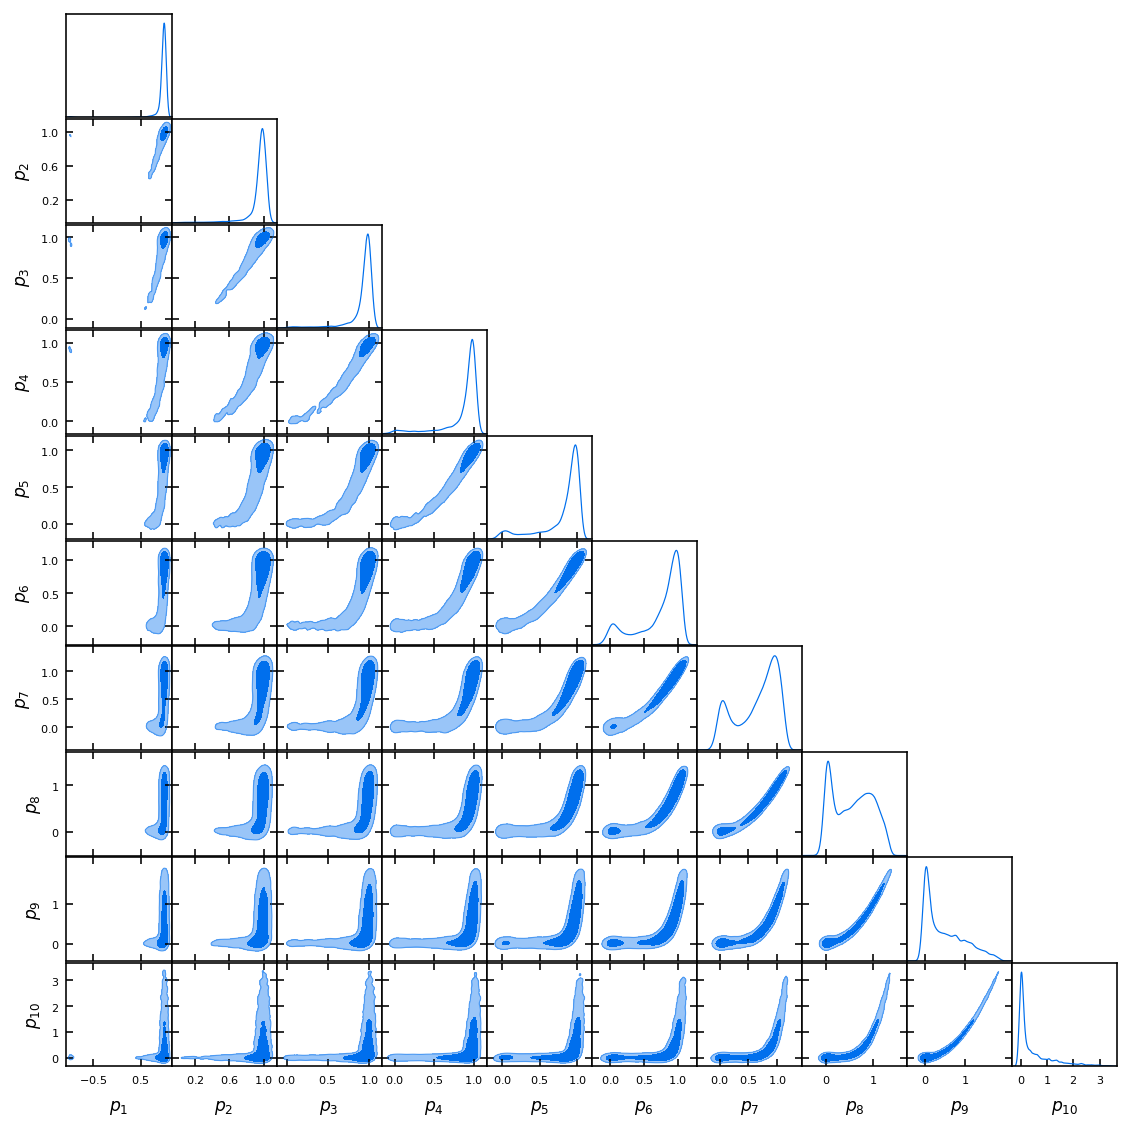

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)